**Train SVM Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

2. Load the datasets for model training

In [2]:
# Load the data from csv
x_data =pd.read_csv('../data/interim/x_data.csv')
y_data =pd.read_csv('../data/interim/y_data.csv')
x_oversample =pd.read_csv('../data/interim/x_oversample.csv')
y_oversample =pd.read_csv('../data/interim/y_oversample.csv')
x_undersample =pd.read_csv('../data/interim/x_undersample.csv')
y_undersample =pd.read_csv('../data/interim/y_undersample.csv')
x_test =pd.read_csv('../data/interim/x_test.csv')
y_test =pd.read_csv('../data/interim/y_test.csv')


3. Set up baseline model

In [3]:
# find the most occuring value and use it as base model
y_mode = y_data.mode()
y_shape = (len(x_data), 1)
y_base = np.full(y_shape, y_mode)

In [4]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data, y_base)

0.833125

4. Train SVC model

In [5]:
from sklearn.svm import SVC
datasets = [(x_data, y_data), (x_oversample, y_oversample), (x_undersample, y_undersample)]
models = []

for i, (x, y) in enumerate(datasets):
    svc_model = SVC()
    svc_model.fit(x, y.values.ravel())
    models.append(svc_model)
    print(f'Training score for dataset {i+1}: {svc_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {svc_model.score(x_test, y_test)}')
    print(f'Accuracy for dataset {i+1}: {accuracy_score(y_test, svc_model.predict(x_test))}')

# Accessing the models
svc_model_org = models[0]
svc_model_over = models[1]
svc_model_under = models[2]

Training score for dataset 1: 0.833125
Test score for dataset 1: 0.835625
Accuracy for dataset 1: 0.835625
Training score for dataset 2: 0.6504126031507877
Test score for dataset 2: 0.61
Accuracy for dataset 2: 0.61
Training score for dataset 3: 0.6264044943820225
Test score for dataset 3: 0.62125
Accuracy for dataset 3: 0.62125


5. Exam the model

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

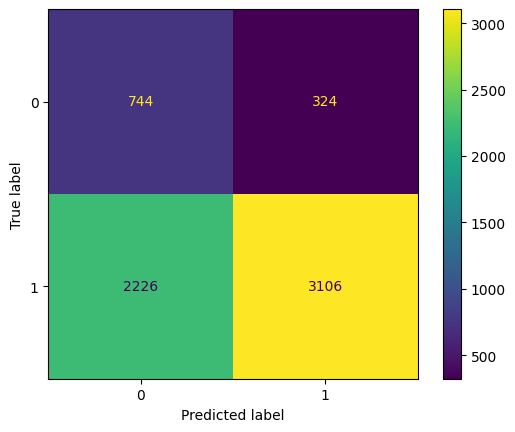

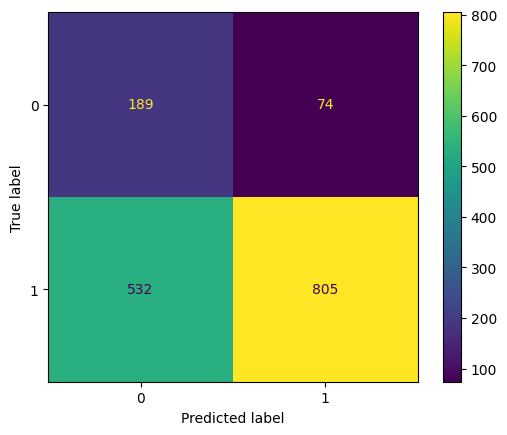

In [11]:
ConfusionMatrixDisplay.from_estimator(svc_model_under, x_data, y_data)
ConfusionMatrixDisplay.from_estimator(svc_model_under, x_test, y_test)

6. Conclusion
From the EDA and the model training result, SVM may not be the ideal algorithm for this case.